In [2]:
import numpy as np
import matplotlib.pyplot as plt

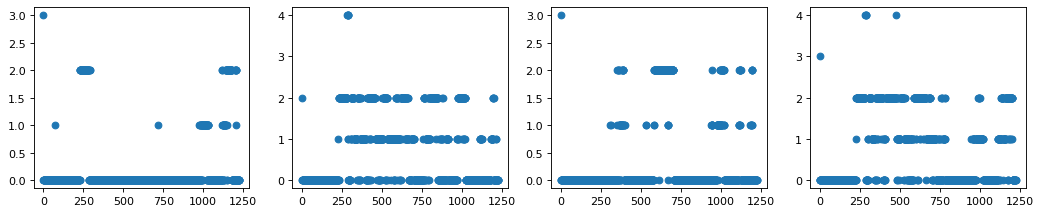

In [9]:
def _load(fn):
    return np.load(fn)['stages']

def _plot(xx):
    plt.figure(figsize=(16, 3), dpi=80)
    for kk in range(4):
        plt.subplot(1,4,kk+1)
        plt.scatter(np.arange(xx.shape[1]), xx[kk])

# fn='session_export/D01/A0005/1626150859.416/ds_stages_1626150859.416.npz'
# # fn='session_export/D03/A0004/1626764751.519/ds_stages_1626764751.519.npz'
# xx=_load(fn)
# _plot(xx)

fll = [str(xx) for xx in Path(eeg_path).rglob('eeg_*.npz')]



In [ ]:
zdat = np.load('out_sleepedf/predict/new_pred_test.npz')
plt.scatter(np.arange(len(zdat['y_pred'])), zdat['y_pred'])
plt.figure()
zdat = np.load('out_sleepedf/predict/new_pred_test1.npz')
plt.scatter(np.arange(len(zdat['y_pred'])), zdat['y_pred'])

In [ ]:
from scipy.signal import resample

eeg_path = '/nfs/homes/prince/ml/sleep_staging/session_export/D03/A0004/1625897580.406/eeg_1625897580.406.npz'
zdata = np.load(eeg_path)
eeg_ts = zdata['ts_array']
eeg_data = zdata['eeg_array']
eeg_val = zdata['valid_array']

wlen_s = 30
wlen = 256 * wlen_s
mod_data = -1 * (eeg_data.shape[0]%wlen)
m_aug_data = eeg_data[:mod_data]
re_aug_data = m_aug_data.reshape(int(m_aug_data.shape[0]/wlen),wlen,4)

ore_aug_data = re_aug_data[:,:,1]
resampled_aug = np.array([resample(x-np.mean(x), 3000) for x in ore_aug_data])
ocx = resampled_aug.reshape(resampled_aug.shape[0], resampled_aug.shape[1], 1, 1)
ocy = np.zeros(len(ocx))

In [ ]:
# 4896/256
# print(m_aug_data.shape, re_aug_data.shape, resampled_aug.shape, ocx.shape)
# print([kk for kk in range(5,10,2)])

ocx = np.load('0-1.npy')[:,:,0,0]
xx = np.load('0.npy')[:,:,0,0]

print(ocx.shape, xx.shape)
for kk in range(110,200,10):
    plt.figure()
    plt.title('muse')
    plt.plot(ocx[kk])
    plt.figure()
    plt.title('data')
    plt.plot(xx[kk])


In [ ]:
for kk in range(110,120):
    plt.figure()
    plt.plot(ore_aug_data[kk])
    plt.figure()
    plt.plot(resampled_aug[kk])
